# Chronological Evolution of Activation Functions (Academic and Mathematical Perspective)

---

## 1. The Biological and Mathematical Foundations (1943–1980s)

| **Era** | **Function / Paper** | **Authors / Institution** | **Mathematical Principle** | **Scientific Role** |
|----------|----------------------|----------------------------|-----------------------------|----------------------|
| 1943 | *A Logical Calculus of the Ideas Immanent in Nervous Activity* | Warren McCulloch & Walter Pitts | Step Function:  $$f(x) = \begin{cases} 1, & x > 0 \\ 0, & x \le 0 \end{cases}$$ | Modeled a neuron as a binary threshold device, forming the basis of artificial neural networks (ANNs). |
| 1958 | *The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain* | Frank Rosenblatt | Linear activation \( f(x) = x \) and binary step for classification | Established the linear separability paradigm; activation treated as deterministic thresholding. |
| 1986 | *Learning Internal Representations by Error Propagation* | Rumelhart, Hinton & Williams | Introduced Sigmoid for differentiable approximation:  $$\sigma(x) = \frac{1}{1 + e^{-x}}$$ | Enabled backpropagation by ensuring continuous differentiability; first mathematically tractable activation for gradient-based learning. |

**Statistical Context:**  
Sigmoid functions approximate posterior probabilities under logistic regression assumptions, aligning neural activations with probabilistic models.

---

## 2. Early Smooth Nonlinearities and Gradient Saturation (1980s–1990s)

| **Function** | **Equation** | **Key Idea** | **Scientific Limitation** |
|---------------|---------------|---------------|-----------------------------|
| **Hyperbolic Tangent (tanh)** |  $$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ | Centered outputs in (-1, 1) to improve gradient symmetry. | Still saturates for large \(|x|\). |
| **Softsign** |  $$f(x) = \frac{x}{1 + |x|}$$ | Smooth alternative with slower saturation. | Suffers gradient decay when \(|x|\) is large. |

**Mathematical Insight:**  
Both Sigmoid and Tanh introduce nonlinear differentiability but suffer from gradient decay when \(|x|\) grows large, limiting network depth.

---

## 3. The ReLU Revolution (2000–2012)

| **Function / Paper** | **Equation** | **Mathematical Contribution** | **Impact on Deep Learning** |
|----------------------|---------------|-------------------------------|-----------------------------|
| **ReLU (Rectified Linear Unit)** — Hahnloser et al., 2000; Nair & Hinton, 2010 |  $$f(x) = \max(0, x)$$ | Piecewise linear, unbounded for positive inputs, zero for negatives. | Overcame saturation and vanishing gradient; enabled training of very deep CNNs (e.g., AlexNet, 2012). |

**Scientific Explanation:**  
ReLU approximates half-wave rectification observed in biological neurons and ensures sparse activations.  
However, it introduces the **“dead neuron”** problem, where gradients vanish for all \(x < 0\).

---

## 4. Parametric and Leaky Variants (2013–2015)

| **Function / Paper** | **Equation** | **Statistical View** | **Contribution** |
|-----------------------|---------------|----------------------|------------------|
| **Leaky ReLU (Maas et al., 2013)** |  $$f(x) = \begin{cases} x, & x \ge 0 \\ \alpha x, & x < 0 \end{cases}, \ \alpha = 0.01$$ | Introduced a small slope for negative inputs to retain gradient flow. | Reduced neuron death; improved robustness. |
| **Parametric ReLU (PReLU)** — He et al., 2015 | Same as Leaky ReLU but with learnable \(\alpha\). | Treated slope as a learnable parameter, allowing adaptive gradient balancing. | Enhanced model capacity; used in ResNet. |
| **Randomized Leaky ReLU (RReLU)** — Xu et al., 2015 |  \(\alpha \sim U(l,u)\) | Added stochasticity in \(\alpha\) during training. | Introduced regularization via randomness akin to Bayesian noise injection. |

**Mathematical Insight:**  
The \(\alpha\)-term functions as a **regularization parameter**, trading deterministic dead zones for smooth adaptive learning surfaces.

---

## 5. Smooth and Exponential Activations (2015–2017)

| **Function / Paper** | **Equation** | **Analytical Characteristic** | **Impact** |
|-----------------------|--------------|-------------------------------|-------------|
| **ELU (Exponential Linear Unit)** — Clevert et al., 2015 |  $$f(x) = \begin{cases} x, & x > 0 \\ \alpha(e^x - 1), & x \le 0 \end{cases}$$ | Smooth at \(x=0\); negative saturation normalizes activations. | Faster convergence and better generalization. |
| **SELU (Scaled ELU)** — Klambauer et al., 2017 |  $$f(x) = \lambda \begin{cases} x, & x > 0 \\ \alpha(e^x - 1), & x \le 0 \end{cases}$$ | Self-normalizing under specific \(\lambda, \alpha\) ensuring mean=0, var=1. | Enabled Self-Normalizing Neural Networks; reduced need for BatchNorm. |
| **Softplus (Nair & Hinton, 2010)** |  $$f(x) = \ln(1 + e^x)$$ | Smooth approximation of ReLU. | Conceptual bridge to Swish and GELU despite higher computation cost. |

**Statistical Significance:**  
These functions introduced **smooth differentiability**, allowing continuous gradient evolution and improved stability in deep networks.

---

## 6. Self-Gated and Learned Activations (2017–2019)

### **Swish (Ramachandran, Zoph & Le, Google Brain, 2017)**  
Equation:  
$$f(x) = x \cdot \sigma(x)$$  

**Concept:**  
Self-gating mechanism where input regulates its own activation through a sigmoid gate.  
Non-monotonic, smooth, bounded below, unbounded above.  
Discovered via **reinforcement-learning–based search** for optimal activations.  
Outperformed ReLU across architectures (*Inception, NASNet, Transformer*).  

**Mathematical Role:**  
Interpolates between linear and ReLU-like behaviors:  
$$f(x; \beta) = x \cdot \sigma(\beta x)$$  
Swish thus defines a **continuous spectrum of nonlinearities** between soft and hard gating.

---

### **Mish (Misra, 2019)**  
Equation:  
$$f(x) = x \cdot \tanh(\ln(1 + e^x))$$  

Combines **Softplus** and **Tanh** to yield a smooth curvature with a bounded negative region.  
Statistically similar to Swish but exhibits stronger regularization at large negative \(x\).  

**Analytical Comparison:**  
Both Swish and Mish improve gradient flow; Mish offers slightly stronger regularization but higher computational cost.

---

### **GELU (Gaussian Error Linear Unit)** — Hendrycks & Gimpel, 2016/2017  
Equation:  
$$f(x) = x \cdot \Phi(x), \quad \Phi(x) = \frac{1}{2}\left[1 + \operatorname{erf}\left(\frac{x}{\sqrt{2}}\right)\right]$$  

**Statistical Motivation:**  
Derived from the **CDF of the standard normal distribution**.  
Each neuron’s activation reflects the **probability that a random variable ≤ x**, introducing a probabilistic gating interpretation.  

**Applications:**  
Adopted as default in **Transformers (BERT, GPT)** — modeling smooth, Gaussian-based gating consistent with stochastic regularization.

---

## 7. Contemporary Directions (2020–Present)

| **Family** | **Representative Functions** | **Mathematical / Statistical Idea** | **Focus** |
|-------------|------------------------------|-------------------------------------|------------|
| **Learnable and Adaptive** | ACON, ACON-C, Meta-ACON (2021) | Dynamically learn activation shape via control parameters. | Task-specific adaptability and calibration. |
| **Rational and Polynomial Approximations** | Rational Activation Functions (RAF, 2020) | Approximate nonlinearities with rational polynomials. | Analytical tractability with provable bounds. |
| **Stochastic and Bayesian Activations** | ProbAct (2020) | Introduce noise and uncertainty in activations. | Enhances generalization and uncertainty estimation. |
| **Physics-Inspired** | SiLU, GELU, Swish, Mish variants | Combine smoothness with information-theoretic constraints. | Optimize both convergence and information flow. |

---

## 8. Mathematical Summary Table

| **Activation** | **Function** | **Smooth?** | **Bounded?** | **Monotonic?** | **Differentiable?** | **Statistical Interpretation** |
|-----------------|---------------|-------------|---------------|----------------|----------------------|--------------------------------|
| Step / Binary | 0 or 1 | ✗ | ✓ | ✓ | ✗ | Deterministic classifier |
| Sigmoid | \( \frac{1}{1 + e^{-x}} \) | ✓ | ✓ | ✓ | ✓ | Logistic probability |
| tanh | \( \frac{e^x - e^{-x}}{e^x + e^{-x}} \) | ✓ | ✓ | ✓ | ✓ | Centered normalization |
| ReLU | \( \max(0, x) \) | ✗ | ✗ | ✓ | ✗ | Sparse coding, half-wave rectification |
| Leaky / PReLU | \( x \) or \( \alpha x \) | ✗ | ✗ | ✓ | ✗ | Controlled negative gradient |
| ELU / SELU | \( \alpha(e^x - 1) \) | ✓ | ✓ | ✓ | ✓ | Self-normalizing activations |
| Swish | \( x \cdot \sigma(x) \) | ✓ | Lower ✓ | ✗ | ✓ | Self-gated, probabilistic smooth gating |
| GELU | \( x \cdot \Phi(x) \) | ✓ | Lower ✓ | ✗ | ✓ | Stochastic Gaussian gating |
| Mish | \( x \tanh(\ln(1 + e^x)) \) | ✓ | Lower ✓ | ✗ | ✓ | Regularized self-gated nonlinearity |

---

## 9. Statistical and Scientific Interpretation

**From Determinism → Probabilism:**  
Early activations (Step, Sigmoid) modeled deterministic neurons.  
Modern ones (Swish, GELU) employ **probabilistic gating**, aligning with stochastic inference and uncertainty modeling.

**From Piecewise Linear → Smooth Differentiable Surfaces:**  
ReLU introduced sparse linearity.  
Swish and GELU introduced **smooth curvature**, improving loss surface continuity and gradient stability.

**From Fixed → Adaptive and Learned Nonlinearities:**  
PReLU, ACON, and related functions **learn activation shapes** dynamically, merging deep learning with **meta-learning**.

**From Empirical → Theoretical Coherence:**  
Recent activations are derived from **theoretical constructs** — Gaussian CDFs, exponential forms, or energy-based principles — ensuring both interpretability and mathematical rigor.

---

## 10. Concluding Synthesis

The chronological trajectory of activation functions represents a **shift from heuristic nonlinearity to principled mathematical design**.  
Each generation systematically addressed the limitations of its predecessors:

| **Era** | **Problem Addressed** | **Breakthrough** |
|----------|------------------------|------------------|
| 1940s–1980s | Non-differentiable activations | Logistic & tanh enabled gradient-based learning |
| 2010s | Vanishing gradients | ReLU introduced sparse, efficient learning |
| 2015–2017 | Dead neurons, non-smooth loss | ELU/SELU and Swish achieved smoothness and normalization |
| 2017–Present | Fixed nonlinearity, lack of probabilistic modeling | Swish, GELU, and Mish integrated smooth probabilistic self-gating |

**In essence:**  
Activation functions have evolved from **binary classifiers to probabilistic filters** — each stage mathematically grounded in enhancing gradient flow, stability, and expressivity within modern deep learning systems.


# Comprehensive Taxonomy of Activation Functions in Deep Learning

| **Name** | **Definition** \( f(x) \) | **Typical Uses / Domain** | **Strengths** | **Weaknesses** |
|-----------|----------------------------|-----------------------------|----------------|----------------|
| **Binary Step** | $$f(x) = \begin{cases} 1, & x \ge 0 \\ 0, & x < 0 \end{cases}$$ | Early perceptrons (McCulloch & Pitts, 1943) | Simple and biologically inspired | Non-differentiable; unsuitable for gradient descent |
| **Linear (Identity)** | $$f(x) = x$$ | Linear regression, final layer in continuous output models | Retains input scale; differentiable | No nonlinearity ⇒ no feature composition |
| **Sigmoid (Logistic)** | $$f(x) = \frac{1}{1 + e^{-x}}$$ | Early ANNs, binary classification, output layer | Smooth, bounded (0,1), interpretable as probability | Saturation for large \(|x|\) |
| **Hyperbolic Tangent (tanh)** | $$f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ | Deep networks before ReLU; RNNs | Centered at 0, stronger gradients than sigmoid | Still saturates; gradient vanishing persists |
| **Softsign** | $$f(x) = \frac{x}{1 + |x|}$$ | Sigmoid/tanh alternative | Smooth transition | Gradient decay for large \(|x|\) |
| **Softmax** | $$f_i(x) = \frac{e^{x_i}}{\sum_j e^{x_j}}$$ | Multiclass classification output | Probabilistic interpretation; normalized outputs | Expensive for large classes; sensitive to large logits |
| **ReLU (Rectified Linear Unit)** | $$f(x) = \max(0, x)$$ | CNNs, DNNs; standard for >90% of deep nets | Sparse activations, avoids vanishing gradient, efficient | “Dead neurons” (zero gradient for \(x<0\)), non-smooth |
| **Leaky ReLU** | $$f(x) = \begin{cases} x, & x > 0 \\ \alpha x, & x \le 0 \end{cases}, \ \alpha \approx 0.01$$ | Deep nets prone to dead neurons | Keeps small gradient for \(x<0\) | Slight instability if \(\alpha\) too large |
| **Parametric ReLU (PReLU)** | $$f(x) = \begin{cases} x, & x > 0 \\ \alpha x, & x \le 0 \end{cases}, \ \alpha \text{ learned}$$ | Image models (ResNet, He et al., 2015) | Learns optimal \(\alpha\); improves convergence | Extra parameters; risk of overfitting |
| **Randomized Leaky ReLU (RReLU)** | $$f(x) = \begin{cases} x, & x > 0 \\ \alpha x, & x \le 0 \end{cases}, \ \alpha \sim U(l,u)$$ | Regularization for CNNs | Adds noise-based regularization | Non-deterministic inference |
| **ELU (Exponential Linear Unit)** | $$f(x) = \begin{cases} x, & x > 0 \\ \alpha(e^x - 1), & x \le 0 \end{cases}$$ | CNNs, MLPs with normalization | Smooth; negative mean → faster convergence | More expensive; sensitive to \(\alpha\) |
| **SELU (Scaled ELU)** | $$f(x) = \lambda \begin{cases} x, & x > 0 \\ \alpha(e^x - 1), & x \le 0 \end{cases}$$ | Self-normalizing networks (Klambauer et al., 2017) | Keeps activations normalized automatically | Requires specific initialization |
| **Softplus** | $$f(x) = \ln(1 + e^x)$$ | Smooth ReLU approximation | Differentiable everywhere | Expensive; small gradients for large negatives |
| **Swish** | $$f(x) = x \cdot \sigma(x)$$ | Vision, NLP, Transformers | Smooth, non-monotonic, self-gated | Slightly higher compute cost |
| **Swish-β** | $$f(x; \beta) = x \cdot \sigma(\beta x)$$ | Learned \(\beta\) for adaptability | Interpolates between linear & ReLU | Requires tuning or learning \(\beta\) |
| **Mish** | $$f(x) = x \cdot \tanh(\ln(1 + e^x))$$ | CNNs, NLP; ResNeSt | Smooth, self-regularized, better than Swish in some tasks | Slower due to nested functions |
| **GELU (Gaussian Error Linear Unit)** | $$f(x) = x \Phi(x), \quad \Phi(x) = \frac{1}{2}[1 + \operatorname{erf}(\frac{x}{\sqrt{2}})]$$ | Transformers (BERT, GPT) | Probabilistic gating; smooth Gaussian shape | Computationally expensive |
| **SiLU (Sigmoid Linear Unit)** | $$f(x) = x \cdot \sigma(x)$$ | YOLOv5; identical to Swish | Easy to implement | Same tradeoffs as Swish |
| **Hard Sigmoid** | $$f(x) = \max(0, \min(1, 0.2x + 0.5))$$ | Low-power / quantized models | Fast linear approximation | Poor gradient accuracy near thresholds |
| **Hard Swish (H-Swish)** | $$f(x) = x \cdot \frac{\max(0, \min(1, (x+3)/6))}{}$$ | MobileNetV3 | Efficient Swish variant | Coarser gradient transitions |
| **Hard Tanh** | $$f(x) = \max(-1, \min(1, x))$$ | Embedded systems | Bounded, stable | Non-smooth; poor gradient propagation |
| **Maxout** | $$f(x) = \max_i(xW_i + b_i)$$ | Robust to dead neurons | Learns arbitrary convex functions | Doubles parameters; heavy memory use |
| **Logistic ReLU (LReLU)** | $$f(x) = x \cdot \sigma(x)$$ | Prototype in activation search | Early step toward Swish | Limited validation |
| **Bent Identity** | $$f(x) = \frac{\sqrt{x^2 + 1} - 1}{2} + x$$ | Shallow ANNs | Smooth transition; less saturating | Uncommon; weaker empirical results |
| **Arctangent (arctan)** | $$f(x) = \arctan(x)$$ | Early smooth alternatives | Bounded and smooth | Saturation and slow learning |
| **Soft Exponential (SoftExp)** | $$f(x; \alpha) = \begin{cases} \frac{e^{\alpha x} - 1}{\alpha} + \alpha, & \alpha \neq 0 \\ x, & \alpha = 0 \end{cases}$$ | Tunable activation; generalizes linear & exp | Extremely flexible | Hard to tune \(\alpha\); can explode |
| **Exponential (ExpLU)** | $$f(x) = e^x - 1$$ | Theoretical studies | Strong gradient for negatives | Unbounded outputs; instability |
| **SquarePlus** | $$f(x) = x + \sqrt{x^2 + b^2}, \quad b>0$$ | Smooth ReLU alternative | Continuous first & second derivative | Needs tuning of \(b\) |
| **ReLU6** | $$f(x) = \min(\max(0, x), 6)$$ | MobileNet, efficient CNNs | Clipped ReLU for quantization safety | Gradient cutoff at 6 reduces dynamic range |
| **Thresholded ReLU (TReLU)** | $$f(x) = \begin{cases} x, & x > \theta \\ 0, & x \le \theta \end{cases}$$ | Sparse activation control | Tunable threshold | Non-differentiable at \(\theta\) |
| **Power ReLU** | $$f(x) = \max(0, x)^p$$ | Feature scaling control | Enhances sensitivity for large x | Explodes for large \(p\) |
| **ELiSH** | $$f(x) = \begin{cases} x\sigma(x), & x \ge 0 \\ (e^x - 1)\sigma(x), & x < 0 \end{cases}$$ | Combines ELU + Swish | Smooth + self-gating | Complex computation |
| **Hard ELiSH** | Uses hard sigmoid approximation of ELiSH | Mobile/quantized inference | Low-cost Swish-ELU hybrid | Gradient discontinuities |
| **APL (Adaptive Piecewise Linear)** | $$f(x) = \max(0, x) + \sum_i a_i \max(0, -x + b_i)$$ | Custom activation learning | Learns arbitrary piecewise linear maps | Increases parameters; complex optimization |
| **TanhShrink** | $$f(x) = x - \tanh(x)$$ | Regularization layer | Penalizes large activations | Underused; weak gradients |
| **SoftShrink** | $$f(x) = \begin{cases} x - \lambda, & x > \lambda \\ x + \lambda, & x < -\lambda \\ 0, & |x| \le \lambda \end{cases}$$ | Denoising autoencoders | Enforces sparsity | Gradient discontinuity at \(\lambda\) |
| **HardShrink** | Step-based version of SoftShrink | Sparse representation | Enforces sparsity | Non-smooth; information loss |
| **LogSig** | $$f(x) = \ln(1 + e^x) - \ln(2)$$ | Intermediate between Softplus & linear | Smooth bounded derivative | Computationally heavy |
| **Gumbel-Softmax** | $$f_i(x) = \frac{\exp((\log(\pi_i)+g_i)/\tau)}{\sum_j \exp((\log(\pi_j)+g_j)/\tau)}$$ | Differentiable sampling, discrete relaxations | Enables gradient-based sampling | Sensitive to temperature \(\tau\) |
| **ACON (Activate or Not)** | $$f(x) = (p_1x - p_2x)\sigma(\beta(p_1x - p_2x)) + p_2x$$ | Learnable Swish generalization | Dynamic control over activation shape | More parameters and complexity |
| **Meta-ACON** | Dynamic β controlled by attention | Vision Transformers | Task-aware adaptivity | Higher compute load |
| **LiSHT (Linear Scaled Hyperbolic Tangent)** | $$f(x) = x \tanh(x)$$ | Alternative to Mish | Symmetric, smooth, zero-centered | Can oversaturate for large \(x\) |
| **ReSin (Rectified Sine)** | $$f(x) = \max(0, \sin(x))$$ | Periodic modeling tasks | Periodic activation, bounded | Gradient oscillations |
| **Sinusoidal (SIREN)** | $$f(x) = \sin(\omega x)$$ | Neural implicit representations (NeRFs, SDFs) | Captures high-frequency details | Sensitive to initialization; oscillatory gradients |
| **GaLU (Gaussian Linear Unit)** | $$f(x) = x \cdot e^{-\beta x^2}$$ | Probabilistic networks | Gaussian-shaped gating | Vanishing gradients for large |
| **Snake** | $$f(x) = x + \frac{1}{\beta}\sin^2(\beta x)$$ | Implicit neural representations | Periodic + linear term avoids bias drift | Requires tuning \(\beta\) |
| **TReLU-Norm** | $$f(x) = \max(0, \frac{x}{\|x\|})$$ | Geometric deep learning | Normalized rectification | Not widely tested empirically |
| **BinaryConnect (Sign Function)** | $$f(x) = \operatorname{sign}(x)$$ | Binary neural networks | Efficient binary activation | Non-differentiable; needs STE approximation |

---

## **Categorical Summary**

| **Category** | **Representative Functions** | **Main Goal / Feature** |
|---------------|-------------------------------|--------------------------|
| **Classical (1940s–1980s)** | Step, Sigmoid, tanh | Differentiability and biological analogy |
| **Rectified (2010–2015)** | ReLU, Leaky ReLU, PReLU, ELU, SELU | Gradient stability, computational simplicity |
| **Smooth & Self-Gated (2017–2020)** | Swish, Mish, GELU, SiLU | Smooth, non-monotonic, probabilistic gating |
| **Adaptive / Learnable (2019–Present)** | ACON, Meta-ACON, PReLU, SoftExp | Learn activation shape dynamically |
| **Periodic & Implicit (2020–Present)** | Sin, Snake, SIREN | Capture high-frequency or geometric structures |
| **Sparse / Shrinkage (Regularizing)** | SoftShrink, HardShrink, TanhShrink | Implicit regularization and noise suppression |

---

## **10. Academic Insight**

- **From Sigmoid to ReLU:** Shifted focus from smooth bounded probabilities → sparse efficient activations.  
- **From ReLU to Swish/GELU:** Moved toward smooth probabilistic gating and differentiable optimization landscapes.  
- **From Swish to Adaptive Activations:** Emergence of data-driven nonlinearity learning, integrating statistical parameterization directly into the neuron’s function.  
- **From Static to Dynamic Activations:** Modern models (e.g., ACON, SIREN) treat activation functions as **learnable operators** rather than fixed transforms.


In [1]:
# ============================================================
#  Activation Functions
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# -----------------------------
# 1. Define activation functions
# -----------------------------

def step(x):
    return np.where(x >= 0, 1, 0)

def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def softsign(x):
    return x / (1 + np.abs(x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def prelu(x, alpha=0.2):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu(x, alpha=1.67326, scale=1.0507):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def softplus(x):
    return np.log1p(np.exp(x))

def swish(x, beta=1.0):
    return x * sigmoid(beta * x)

def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

def gelu(x):
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

def hard_sigmoid(x):
    return np.clip(0.2 * x + 0.5, 0, 1)

def hard_swish(x):
    return x * np.clip((x + 3) / 6, 0, 1)

def relu6(x):
    return np.minimum(np.maximum(0, x), 6)

def bent_identity(x):
    return ((np.sqrt(x**2 + 1) - 1) / 2) + x

def soft_exponential(x, alpha=0.5):
    return np.where(alpha != 0, (np.exp(alpha * x) - 1) / alpha + alpha, x)

def squareplus(x, b=4.0):
    return (x + np.sqrt(x**2 + b)) / 2

def sin_activation(x):
    return np.sin(x)

def snake(x, beta=1.0):
    return x + (1 / beta) * np.sin(beta * x) ** 2

def gaussian(x, beta=0.5):
    return x * np.exp(-beta * x**2)

def tanhshrink(x):
    return x - np.tanh(x)

def softshrink(x, lam=0.5):
    return np.where(x > lam, x - lam, np.where(x < -lam, x + lam, 0))

def hard_tanh(x):
    return np.clip(x, -1, 1)

def lisht(x):
    return x * np.tanh(x)

In [2]:
# -----------------------------
# 2. Prepare input range
# -----------------------------
x = np.linspace(-6, 6, 500)

In [3]:
# -----------------------------
# 3. Organize functions into categories
# -----------------------------
activations = {
    "Classical": [
        ("Step", step),
        ("Linear", linear),
        ("Sigmoid", sigmoid),
        ("tanh", tanh),
        ("Softsign", softsign),
    ],
    "Rectified Family": [
        ("ReLU", relu),
        ("Leaky ReLU", leaky_relu),
        ("PReLU (α=0.2)", prelu),
        ("ELU", elu),
        ("SELU", selu),
        ("Softplus", softplus),
        ("ReLU6", relu6)
    ],
    "Smooth & Self-Gated": [
        ("Swish", swish),
        ("Mish", mish),
        ("GELU", gelu),
        ("Hard Sigmoid", hard_sigmoid),
        ("Hard Swish", hard_swish),
    ],
    "Advanced & Experimental": [
        ("Bent Identity", bent_identity),
        ("Soft Exponential", soft_exponential),
        ("SquarePlus", squareplus),
        ("LiSHT", lisht),
        ("Gaussian", gaussian),
        ("Snake", snake),
        ("sin(x)", sin_activation),
    ],
    "Regularizing / Shrinkage": [
        ("TanhShrink", tanhshrink),
        ("SoftShrink", softshrink),
        ("Hard Tanh", hard_tanh)
    ]
}

/tmp/ipython-input-3461830200.py:26: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.97])


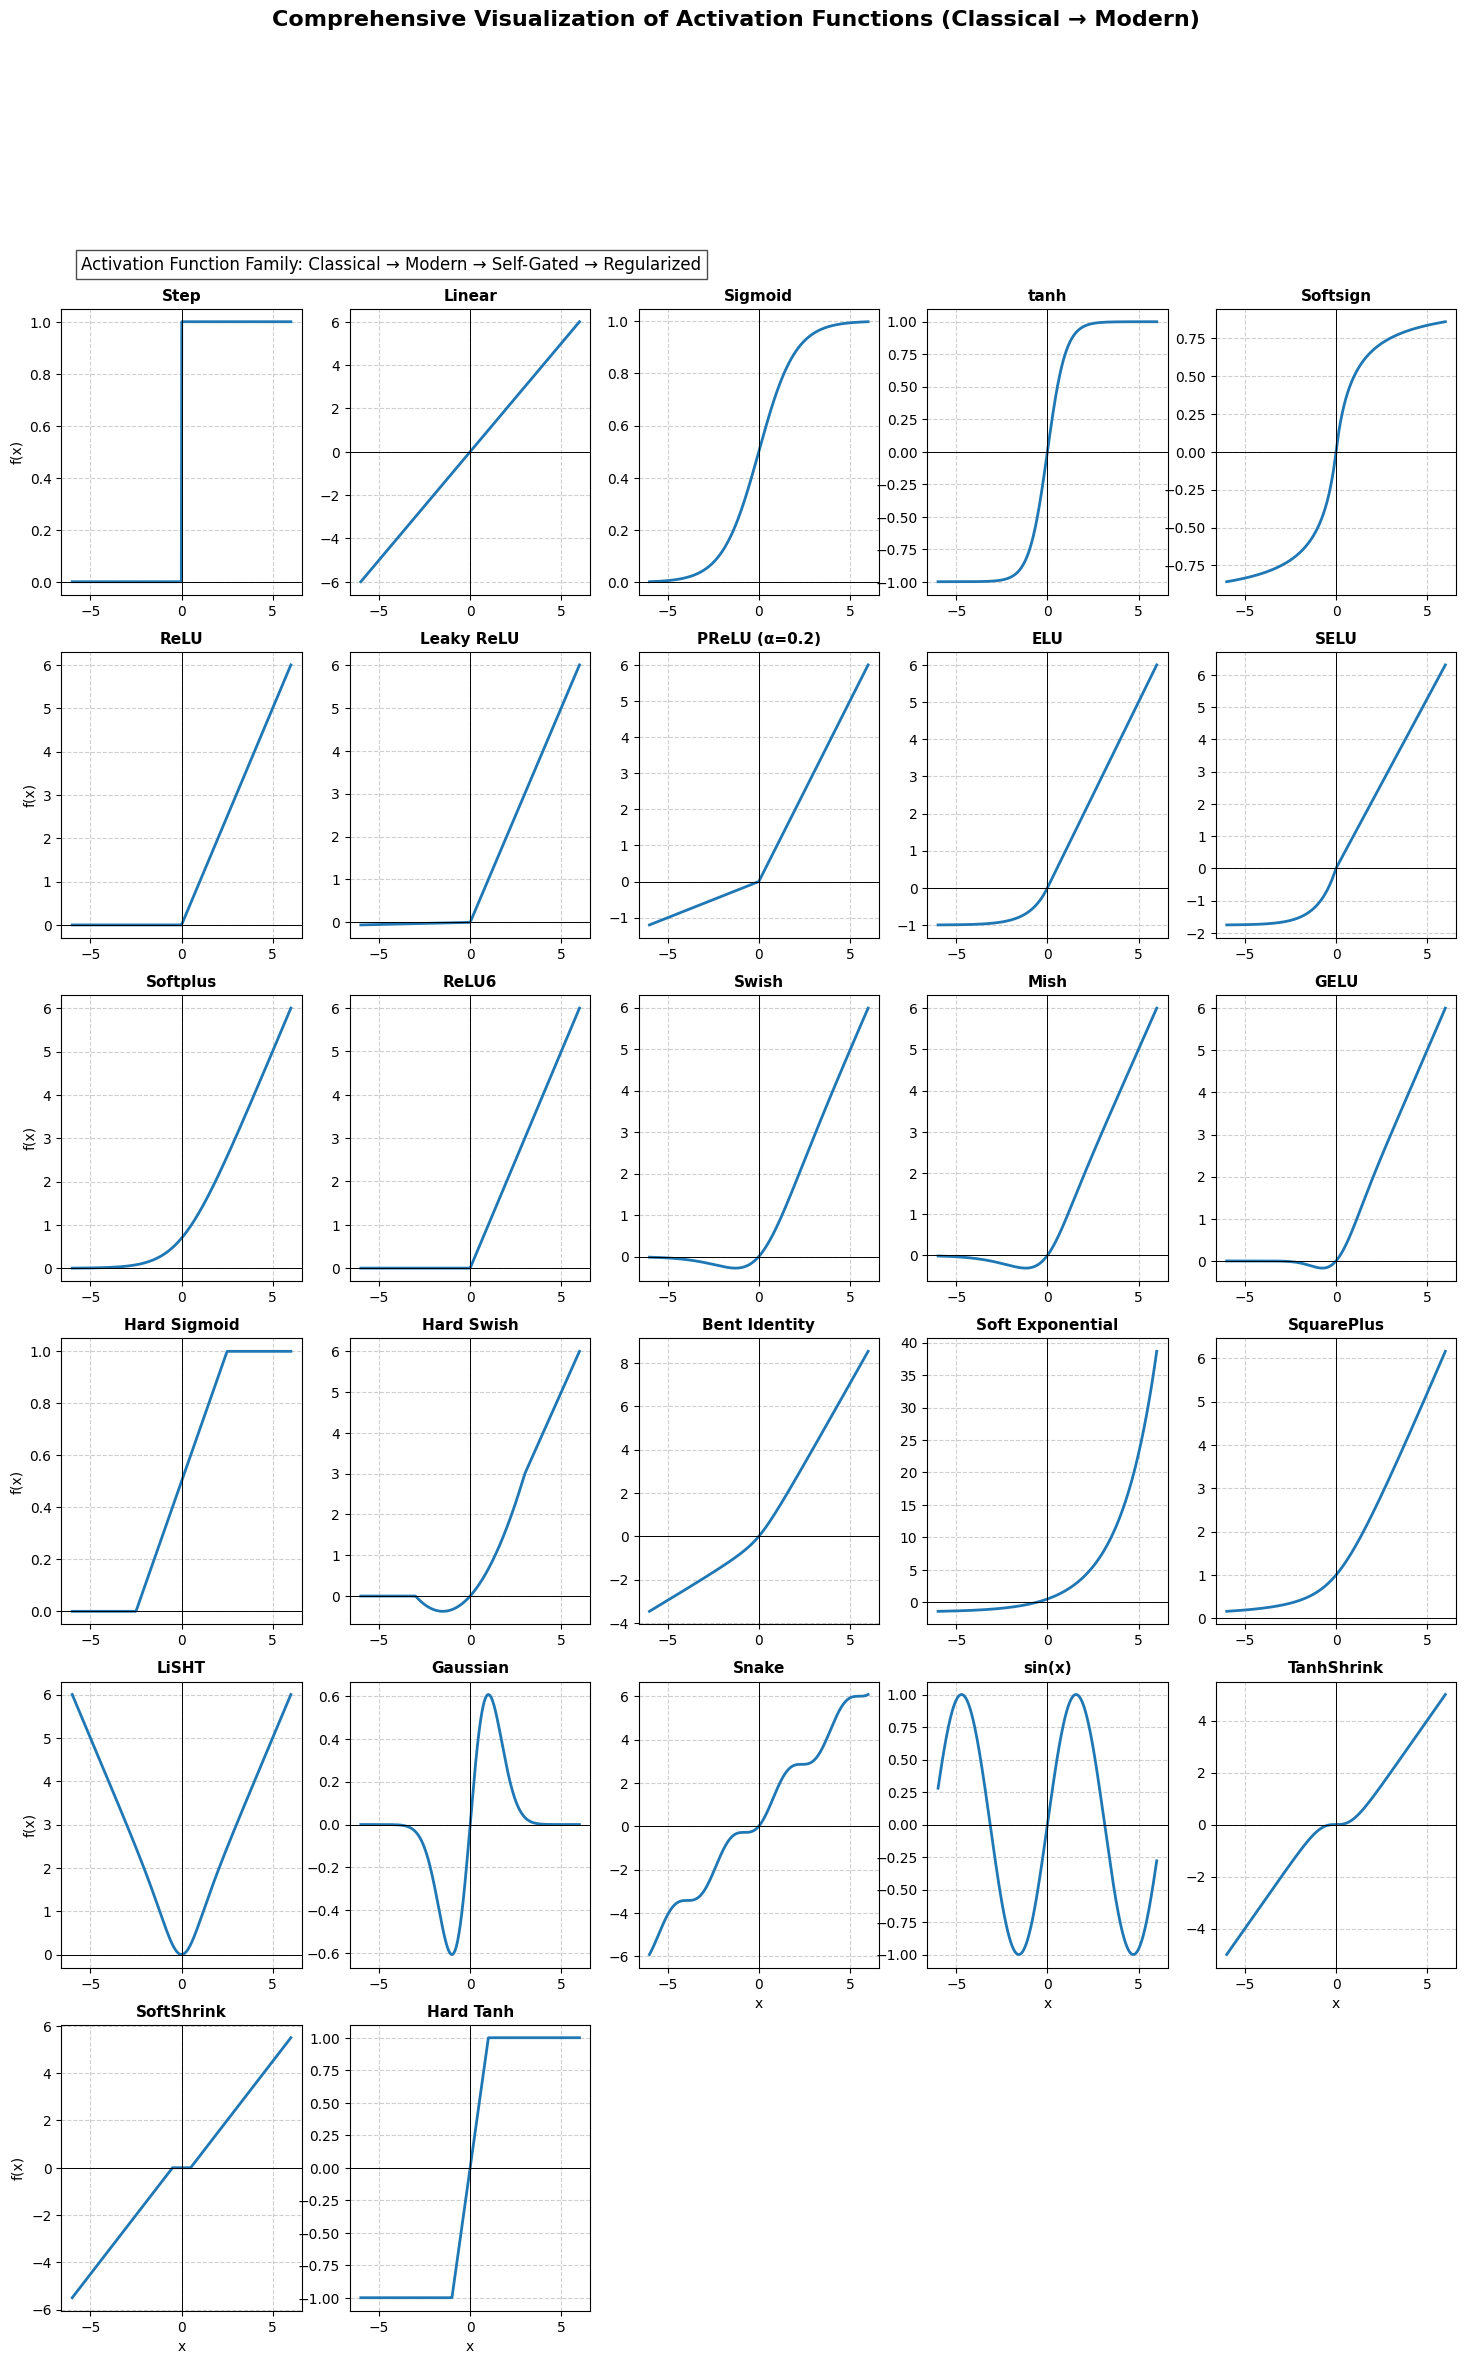

In [4]:
# -----------------------------
# 4. Plot all categories
# -----------------------------
plt.figure(figsize=(18, 26))
plot_index = 1
total = sum(len(v) for v in activations.values())

for category, funcs in activations.items():
    for name, func in funcs:
        y = func(x)
        plt.subplot(6, 5, plot_index)
        plt.plot(x, y, linewidth=2)
        plt.title(f"{name}", fontsize=11, fontweight='bold')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.axhline(0, color='black', lw=0.7)
        plt.axvline(0, color='black', lw=0.7)
        if plot_index == 1:
            plt.text(-5.5, 1.2, "Activation Function Family: Classical → Modern → Self-Gated → Regularized",
                     fontsize=12, bbox=dict(facecolor='white', alpha=0.7))
        if plot_index % 5 == 1:
            plt.ylabel("f(x)", fontsize=10)
        if plot_index > total - 5:
            plt.xlabel("x", fontsize=10)
        plot_index += 1

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Comprehensive Visualization of Activation Functions (Classical → Modern)", fontsize=16, fontweight='bold', y=0.995)
plt.show()

In [18]:
# ============================================================
# Activation Functions and Derivatives
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [19]:
# Define activations and derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def d_sigmoid(x): s = sigmoid(x); return s * (1 - s)

def tanh(x): return np.tanh(x)
def d_tanh(x): return 1 - np.tanh(x)**2

def relu(x): return np.maximum(0, x)
def d_relu(x): return np.where(x > 0, 1, 0)

def leaky_relu(x, a=0.01): return np.where(x>0, x, a*x)
def d_leaky_relu(x, a=0.01): return np.where(x>0, 1, a)

def elu(x, a=1.0): return np.where(x>0, x, a*(np.exp(x)-1))
def d_elu(x, a=1.0): return np.where(x>0, 1, a*np.exp(x))

def selu(x, a=1.67326, l=1.0507): return l*np.where(x>0, x, a*(np.exp(x)-1))
def d_selu(x, a=1.67326, l=1.0507): return l*np.where(x>0, 1, a*np.exp(x))

def softplus(x): return np.log1p(np.exp(x))
def d_softplus(x): return sigmoid(x)

def swish(x): return x * sigmoid(x)
def d_swish(x): s = sigmoid(x); return s + x*s*(1-s)

def mish(x): return x * np.tanh(np.log1p(np.exp(x)))
def d_mish(x): sp=np.log1p(np.exp(x)); t=np.tanh(sp); sech2=1-t**2; return t + x*sech2*sigmoid(x)

def gelu(x): return 0.5*x*(1+erf(x/np.sqrt(2)))
def d_gelu(x): return 0.5*(1+erf(x/np.sqrt(2))) + (x/np.sqrt(2*np.pi))*np.exp(-x**2/2)

def hard_swish(x): return x*np.clip((x+3)/6,0,1)
def d_hard_swish(x): return np.where((x>-3)&(x<3), (x+3)/6 + x/6, np.where(x>=3,1,0))

def relu6(x): return np.minimum(np.maximum(0,x),6)
def d_relu6(x): return np.where((x>0)&(x<6),1,0)

def bent_identity(x): return ((np.sqrt(x**2+1)-1)/2)+x
def d_bent_identity(x): return (x/(2*np.sqrt(x**2+1)))+1

def lisht(x): return x*np.tanh(x)
def d_lisht(x): return np.tanh(x) + x*(1 - np.tanh(x)**2)

def snake(x, b=1): return x + (1/b)*np.sin(b*x)**2
def d_snake(x, b=1): return 1 + np.sin(2*b*x)

def gaussian(x, b=0.5): return x*np.exp(-b*x**2)
def d_gaussian(x, b=0.5): return np.exp(-b*x**2)*(1 - 2*b*x**2)

def sin_activation(x): return np.sin(x)
def d_sin_activation(x): return np.cos(x)

In [20]:
# ------------------------------------------------------------
# Define list of (name, f, f') pairs
# ------------------------------------------------------------
functions = [
    ("Sigmoid", sigmoid, d_sigmoid),
    ("tanh", tanh, d_tanh),
    ("ReLU", relu, d_relu),
    ("Leaky ReLU", leaky_relu, d_leaky_relu),
    ("ELU", elu, d_elu),
    ("SELU", selu, d_selu),
    ("Softplus", softplus, d_softplus),
    ("Swish", swish, d_swish),
    ("Mish", mish, d_mish),
    ("GELU", gelu, d_gelu),
    ("Hard Swish", hard_swish, d_hard_swish),
    ("ReLU6", relu6, d_relu6),
    ("Bent Identity", bent_identity, d_bent_identity),
    ("LiSHT", lisht, d_lisht),
    ("Snake", snake, d_snake),
    ("Gaussian", gaussian, d_gaussian),
    ("sin(x)", sin_activation, d_sin_activation)
]

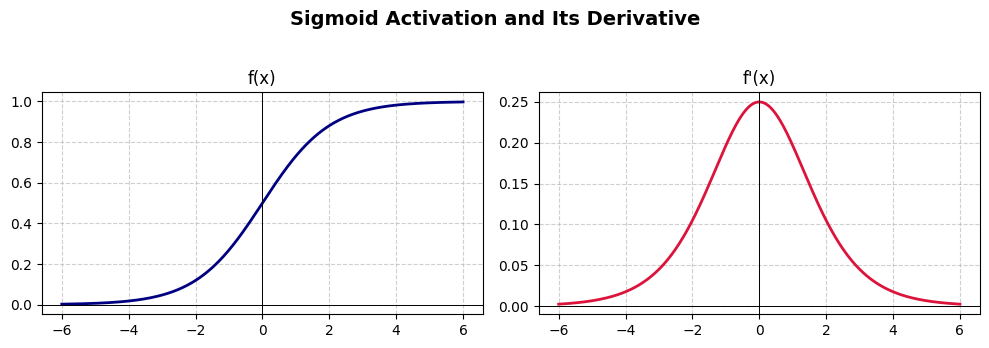

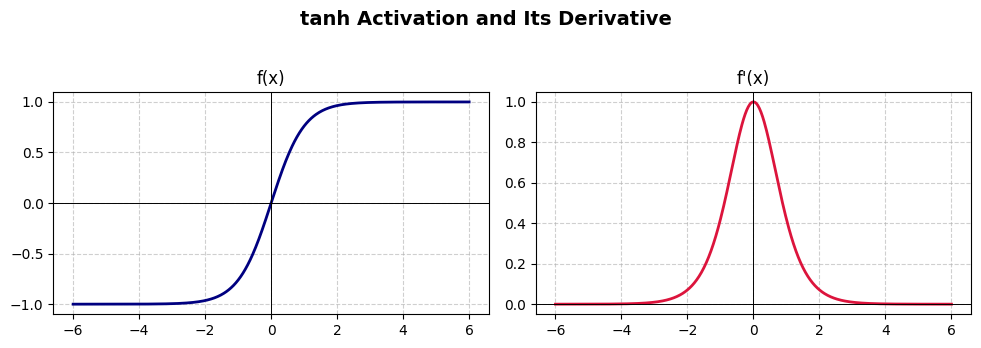

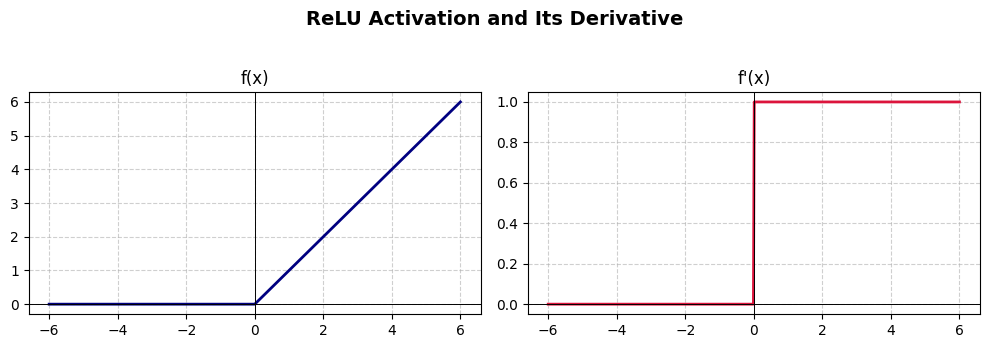

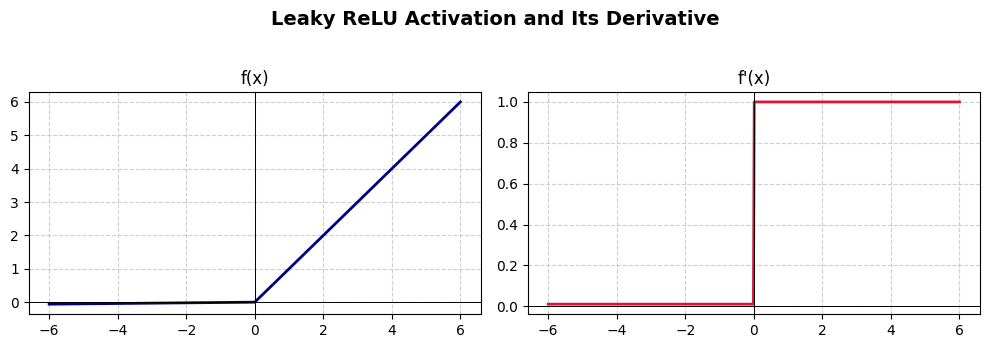

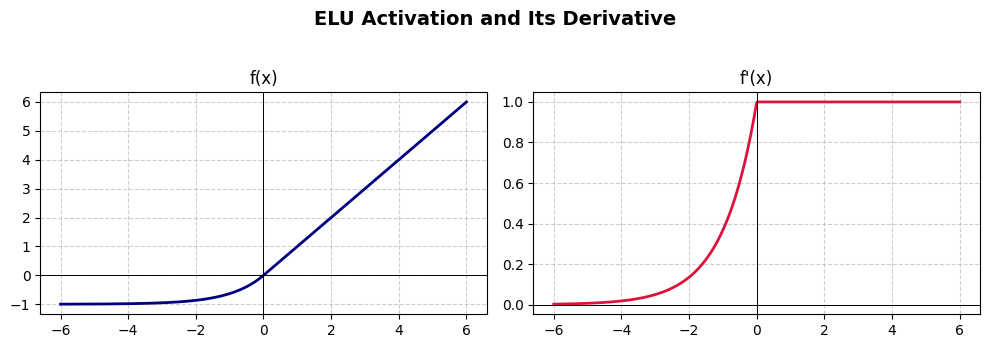

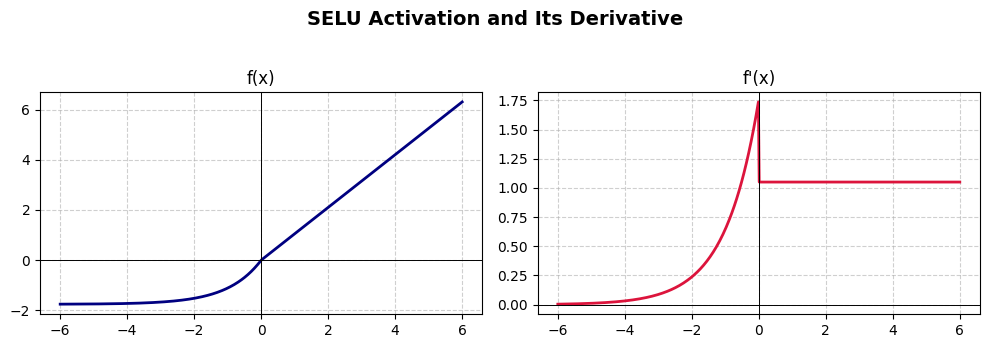

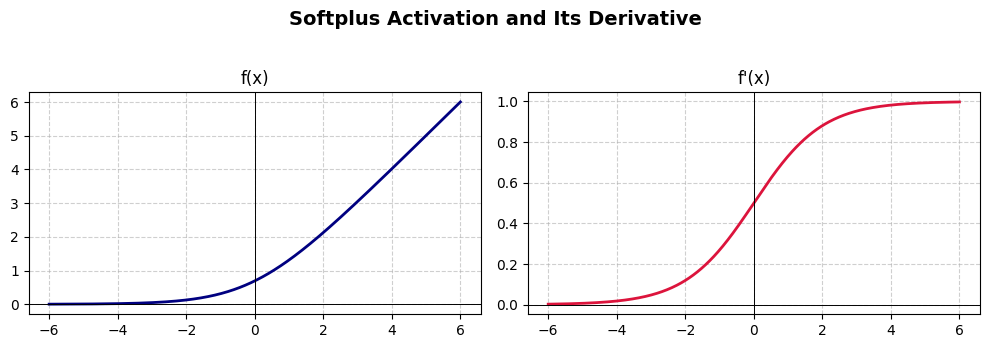

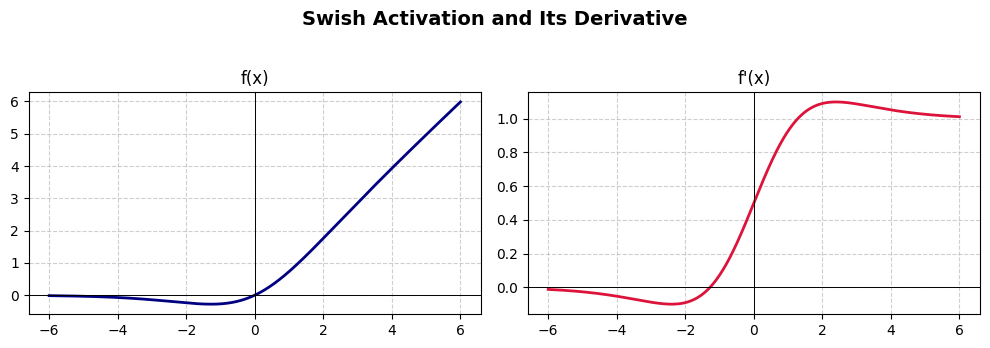

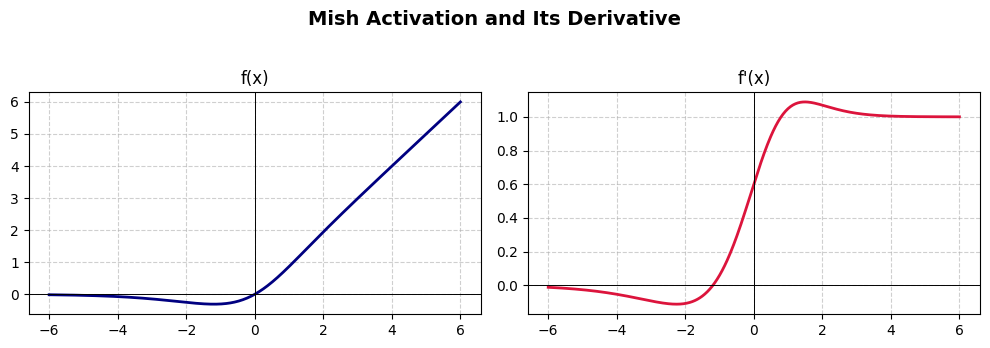

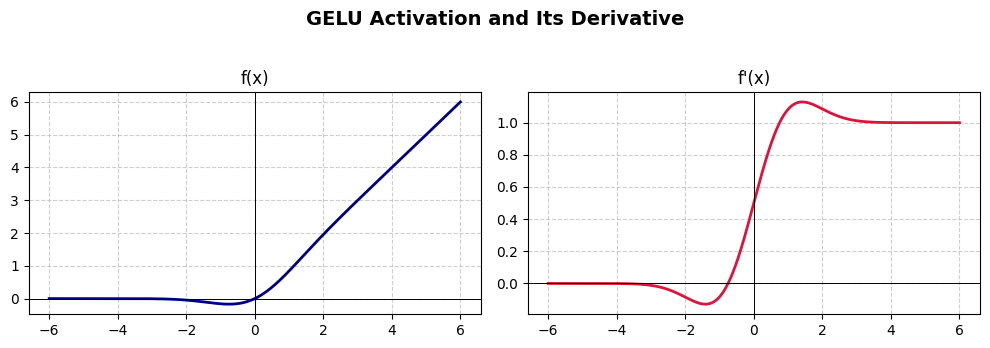

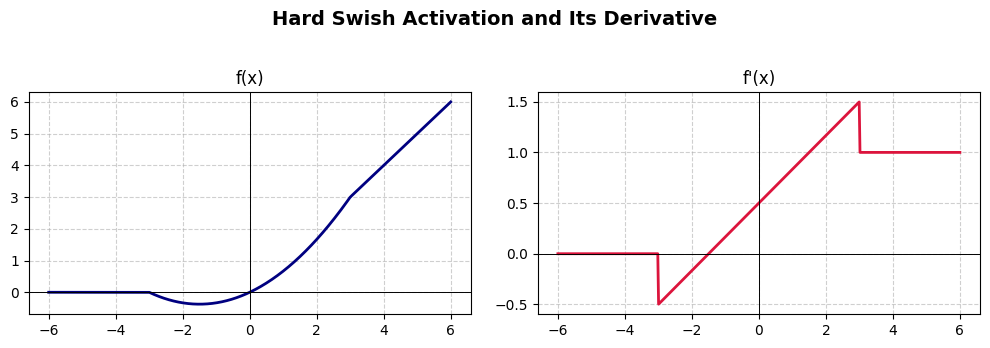

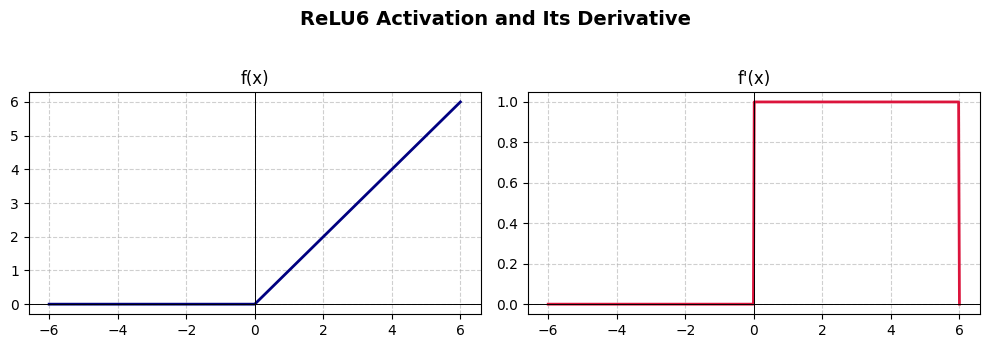

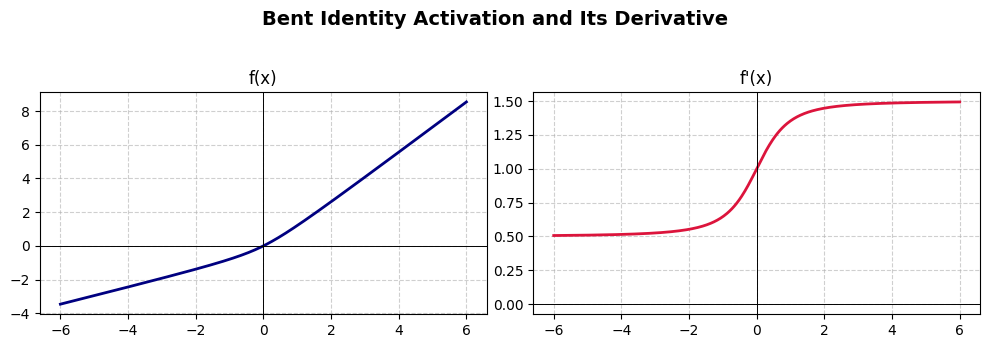

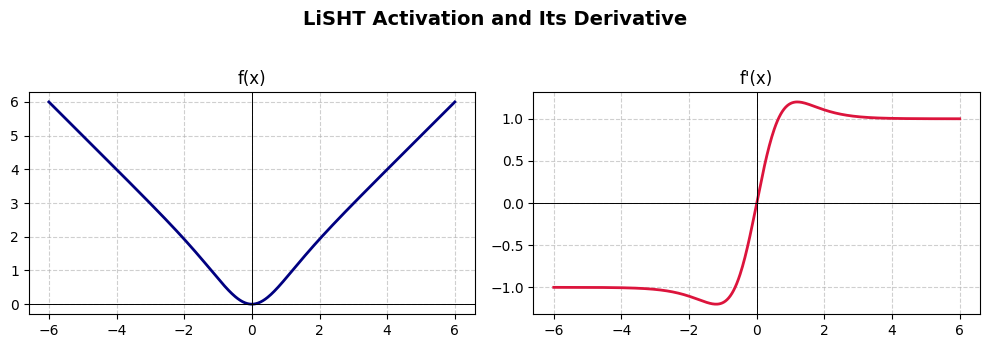

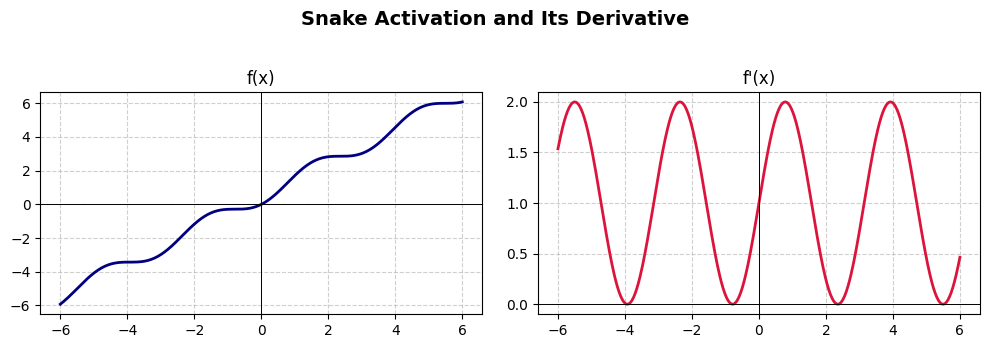

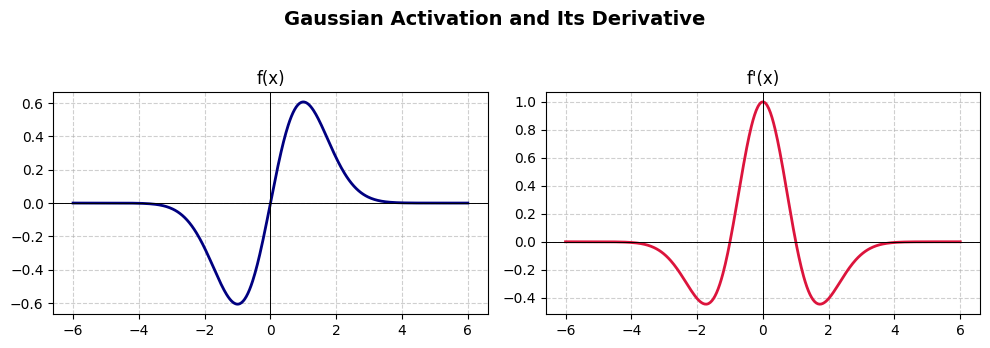

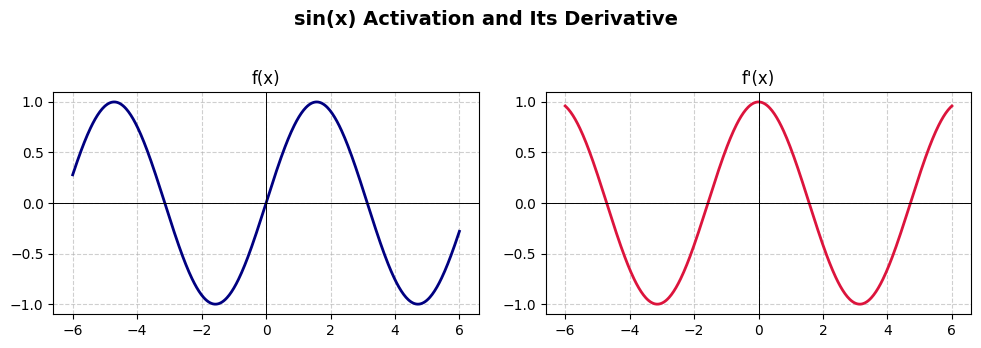

In [21]:
# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------
x = np.linspace(-6, 6, 500)

for name, f, df in functions:
    y = f(x)
    dy = df(x)

    fig, ax = plt.subplots(1, 2, figsize=(10, 3.5))
    fig.suptitle(f"{name} Activation and Its Derivative", fontsize=14, fontweight='bold')

    # f(x)
    ax[0].plot(x, y, color='navy', lw=2)
    ax[0].set_title("f(x)", fontsize=12)
    ax[0].grid(True, linestyle='--', alpha=0.6)
    ax[0].axhline(0, color='black', lw=0.7)
    ax[0].axvline(0, color='black', lw=0.7)

    # f'(x)
    ax[1].plot(x, dy, color='crimson', lw=2)
    ax[1].set_title("f'(x)", fontsize=12)
    ax[1].grid(True, linestyle='--', alpha=0.6)
    ax[1].axhline(0, color='black', lw=0.7)
    ax[1].axvline(0, color='black', lw=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()